In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime as dt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
load_df = pd.read_csv('bangkokpost_news.csv', sep = ';', encoding = 'utf8', index_col=0)
load_df

,Title,Tags,Author,Text,Date
0,Tennis great Boris Becker could face jail afte...,['WORLD'],AFP,» LONDON - Former Wimbledon champion Boris Bec...,2022-04-08
1,Belgium shuts Kinder chocolate factory over sa...,['WORLD'],AFP,» BRUSSELS - Belgian authorities on Friday ord...,2022-04-08
2,Crisis-hit Sri Lanka hikes rates as protests s...,['WORLD'],AFP,» COLOMBO - Cash-strapped Sri Lanka's central ...,2022-04-08
3,First private mission launches for Internation...,['WORLD'],AFP,» WASHINGTON - The first fully private mission...,2022-04-08
4,Russia delivers surprise rate cut,['WORLD'],NaN,» Russia’s central bank unexpectedly slashed i...,2022-04-08
...,...,...,...,...,...
2660,Up to 97% of Thais mask up to go out,['THAILAND'],News,» 97% of Thais'wear masks',2022-03-08
2661,State mulls reply to oil price spike,['BUSINESS'],Business,» The government has two choices to cope with ...,2022-03-08
2662,AIS seeks to empower women at top level,['BUSINESS'],Business,» Advanced Info Service (AIS) reports it has a...,2022-03-08
2663,Think tank recommends metaverse to pace economy,['BUSINESS'],Business,» The government should pay more attention to ...,2022-03-08


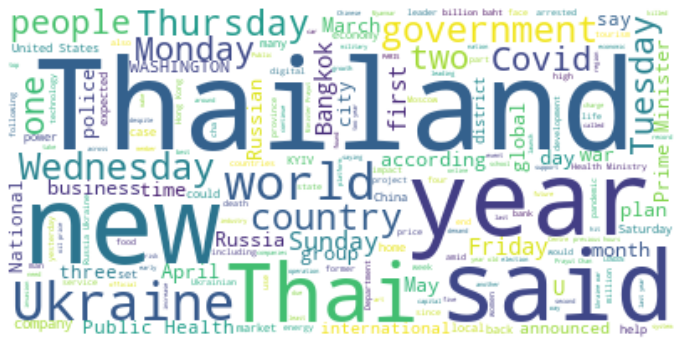

In [3]:
#Создание word cloud по текстам новостей
eng_stopwords = set(stopwords.words('english'))
text = " ".join(text_item for text_item in load_df.Text)
wcloud = WordCloud(stopwords=eng_stopwords, background_color="white").generate(text) #создаём облако
wcloud.to_file("bangkokpost.png") #сохраняем картинку
plt.figure(figsize = (12, 12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
#Анализируем частоту публикаций
news_df = load_df
news_df['Date'] = pd.to_datetime(news_df['Date'])
news_df.sort_values(by='Date', inplace = True)
row_cnt = news_df.shape[0]
days_cnt = (news_df.Date[0] - news_df.Date[row_cnt-1]).days + 1
print("Новости с", news_df.Date[row_cnt-1], "по", news_df.Date[0])
#количесвто выходных всего
date_tmp = news_df.Date[row_cnt-1]
all_holidays_cnt = 0
for i in range(0, days_cnt):
    if date_tmp.weekday() == 5 or date_tmp.weekday() == 6:
        all_holidays_cnt += 1
    date_tmp += dt.timedelta(days=1)
all_workdays_cnt = days_cnt - all_holidays_cnt
news_cnt = row_cnt
print("Количество дней:", days_cnt)
print("Количество рабочих дней:", all_workdays_cnt)
print("Количество выходных:", all_holidays_cnt)
print()
#количесвто выходных, когда были публикации
holidays = set()
workdays = set()
news_workdays = 0
news_holidays = 0
holiday_news = 0
for i in range(0, row_cnt):
    if news_df.Date[i].weekday() == 5 or news_df.Date[i].weekday() == 6:
        holidays.add(news_df.Date[i])
        news_holidays += 1
    else:   
        workdays.add(news_df.Date[i])
        news_workdays += 1
holidays_cnt = len(holidays)
workdays_cnt = len(workdays)
all_days = holidays_cnt + workdays_cnt
print("Количество дней, когда выходили новости:", all_days)
print("Количество рабочих дней, когда выходили новости:", workdays_cnt)
print("Количество выходных, когда выходили новости:", holidays_cnt)
print()
print("Количество новостей:", news_cnt)
print("Количество новостей, которые публиковались в будни:", news_workdays)
print("Количество новостей, которые публиковались в выходные:", news_holidays)

holidays_freq = news_holidays/all_holidays_cnt
workdays_freq = news_workdays/all_workdays_cnt
news_a_day = news_cnt/days_cnt
print()
print("Количество новостей в день:", news_a_day)
print("Частота публикаций в будни:", workdays_freq)
print("Частота публикаций в выходные:", holidays_freq)

Новости с 2022-03-08 00:00:00 по 2022-04-08 00:00:00
Количество дней: 32
Количество рабочих дней: 24
Количество выходных: 8

Количество дней, когда выходили новости: 32
Количество рабочих дней, когда выходили новости: 24
Количество выходных, когда выходили новости: 8

Количество новостей: 2665
Количество новостей, которые публиковались в будни: 2264
Количество новостей, которые публиковались в выходные: 401

Количество новостей в день: 83.28125
Частота публикаций в будни: 94.33333333333333
Частота публикаций в выходные: 50.125


Вывод: На данном сайте новости публикуются каждый день в большом количестве, поэтому нужно собирать данные в будни раз в день. В выходные выходит примерно в 1,5 раза меньше новостей, можно собирать данные раз в два дня по выходным.

In [5]:
#Сгруппируем данные по дате, для построения графика
graph_df = load_df
#graph_df['Date'] = pd.to_datetime(graph_df['Date'])
graph_df = graph_df.drop(columns=['Text', 'Author', 'Tags'])
graph_df = graph_df.groupby('Date').count()
graph_df.rename(columns = {"Title":"Count"}, inplace = True)
graph_df.head(5)

,Count
Date,
2022-03-08,100
2022-03-09,99
2022-03-10,109
2022-03-11,99
2022-03-12,55


<Figure size 1080x720 with 0 Axes>

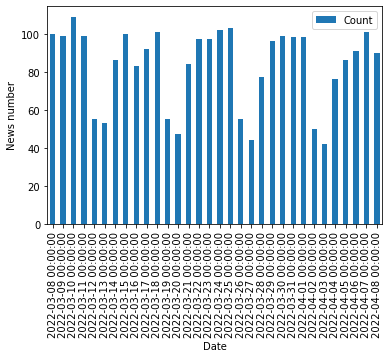

In [6]:
#Построим график выхода новостей
plt.figure(figsize=(15,10))
graph_df.plot.bar()
plt.xlabel("Date")
plt.ylabel("News number")
plt.show()